In [8]:
#  Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

#  Load your dataset
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.drop("Id", axis=1, inplace=True)  # Drop Id column

#  Encode target
df["Species"] = df["Species"].astype("category").cat.codes  # Converts species to 0,1,2

In [10]:
#  Features and target
X = df.drop("Species", axis=1)
y = df["Species"]

#  Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

In [18]:
#  Try different values of K
k_vals = range(1, 21)
accuracies = []

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

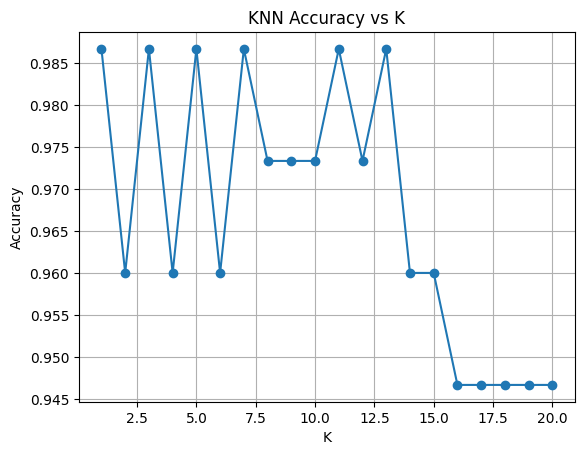

In [19]:
#  Plot K vs Accuracy
plt.plot(k_vals, accuracies, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [20]:
#  Final model with best K
best_k = k_vals[np.argmax(accuracies)]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
final_preds = model.predict(X_test)

print("Best K:", best_k)
print("Accuracy:", accuracy_score(y_test, final_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))
print("Classification Report:\n", classification_report(y_test, final_preds))

Best K: 1
Accuracy: 0.9866666666666667
Confusion Matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



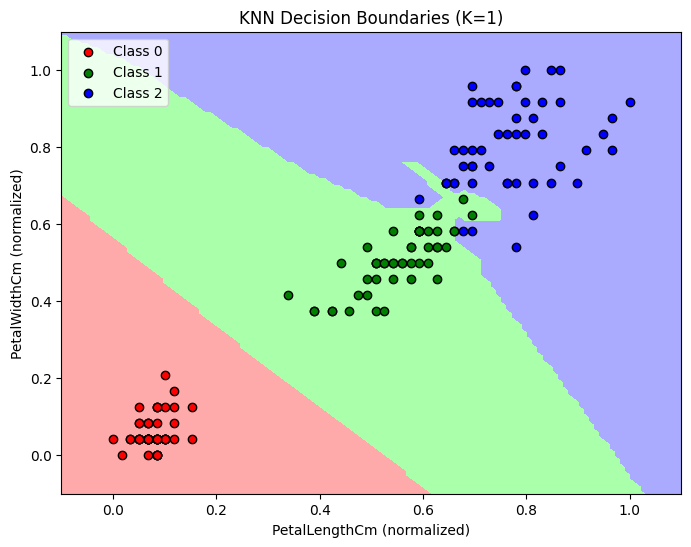

In [21]:
#visualize the  decision boundaries
# Use only 2 features for plotting
from matplotlib.colors import ListedColormap

X_plot = df[["PetalLengthCm", "PetalWidthCm"]].values
y_plot = df["Species"].values

# Normalize
X_plot = MinMaxScaler().fit_transform(X_plot)

# Train
model_plot = KNeighborsClassifier(n_neighbors=best_k)
model_plot.fit(X_plot, y_plot)

# Create meshgrid
h = 0.01
x_min, x_max = X_plot[:, 0].min() - 0.1, X_plot[:, 0].max() + 0.1
y_min, y_max = X_plot[:, 1].min() - 0.1, X_plot[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)
for i, color in enumerate(cmap_bold):
    idx = np.where(y_plot == i)
    plt.scatter(X_plot[idx, 0], X_plot[idx, 1], c=color, label=f"Class {i}", edgecolor='k')

plt.xlabel("PetalLengthCm (normalized)")
plt.ylabel("PetalWidthCm (normalized)")
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.legend()
plt.show()
